# Fraction Differentiation - frac_diff_transf.py

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src/finance_ml')
from fractional_differentiation import frac_diff_transf

## Creating the DataFrame

In [2]:
lenght = int(1e3)
# creating series from a Normal distribution for the returns
df_ret1 = pd.Series(np.random.normal(0.0, 0.01,lenght))
df_ret2 = pd.Series(np.random.normal(0.0, 0.02,lenght))
df_ret3 = pd.Series(np.random.normal(0.0, 0.04,lenght))
# creating the price series
df_price1 = (1 + df_ret1).cumprod()
df_price2 = (1 + df_ret2).cumprod()
df_price3 = (1 + df_ret3).cumprod()
# concatenating the series into a DataFrame
X = pd.concat([df_price1, df_price2, df_price3],axis = 1)
X = X.rename(columns={0:'X1', 1:'X2', 2:'X3'})

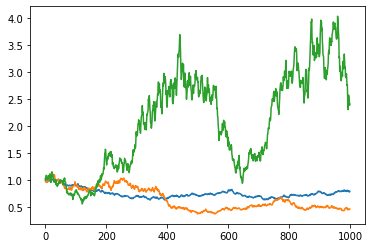

In [3]:
import matplotlib.pyplot as plt

plt.plot(df_price1)
plt.plot(df_price2)
plt.plot(df_price3)

## Fractional Differentiating

In [4]:
# instantiating the FracDiff transformer
data_processor = frac_diff_transf.FracDiff(minimum=True)
# transforming the Data
X_transf = data_processor.transform(X)
X_transf.tail(20)

w array redimensioned to (n, 1).


,X1_fd,X2_fd,X3_fd
980,0.800327,0.111362,1.208261
981,0.812609,0.112757,1.225090
982,0.818051,0.122424,1.373661
983,0.798462,0.122864,1.185727
984,0.795367,0.146197,1.064915
985,0.796463,0.140712,1.132240
986,0.808029,0.136669,0.955970
987,0.804044,0.130476,1.053031
988,0.789035,0.137232,0.994867
989,0.791485,0.141267,1.099545


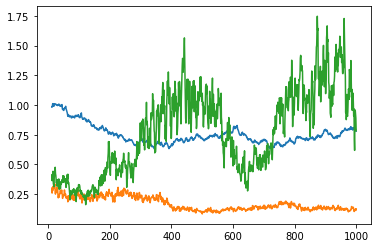

In [5]:
plt.plot(X_transf['X1_fd'])
plt.plot(X_transf['X2_fd'])
plt.plot(X_transf['X3_fd'])

#  Scikit-learn Pipeline for ColumnTransformer Using frac_diff_transf

## Importing Additional Libraries

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Creating and Running Pipeline

### Creating Pipeline

In [7]:
features = ['X1', 'X2', 'X3']

X_train, X_test = train_test_split(X, test_size=0.2, shuffle = False)


# instantiating the transformer
transformer = frac_diff_transf.FracDiff(d=[1., 1.], 
                                        method='fww', 
                                        thres=1e-2,
                                        minimum=True,
                                        min_dict={'interv': [0., 1.], 
                                                  'step': 1e-1, 
                                                  'c_val_idx': int(1)})

# pipeline for the transformer
pipe_frac_diff = Pipeline([("frac_diff", transformer)])
                           
# column transformer using the pipeline transformer
pre_processor = ColumnTransformer([("frac_diff", pipe_frac_diff, features)], remainder='passthrough')

# instantiating the pipeline of ColumnTransformer
pipe = Pipeline([("pp", pre_processor)])

w array redimensioned to (n, 1).


### Estimating Parameters from Train Data Set and Transforming Train Data Set

In [8]:
# trasnforming the series
X_train_transf = pipe.fit_transform(X_train)
X_train_transf.tail(10)

,frac_diff__X1_fd,frac_diff__X2_fd,frac_diff__X3_fd
790,0.258585,0.170349,1.376771
791,0.248394,0.170288,1.218194
792,0.253835,0.167428,0.994277
793,0.249546,0.162555,0.818272
794,0.250245,0.173131,0.917893
795,0.252105,0.174496,1.003314
796,0.257055,0.154166,1.065042
797,0.249278,0.169845,0.913878
798,0.240403,0.169531,0.952928
799,0.250269,0.172757,1.020207


### Estimating  Paramenters from Train Data Set

In [9]:
# instantiating the FracDiff transformer
data_processor = frac_diff_transf.FracDiff(minimum = True)
# transforming the Data
X_transf = data_processor.fit(X_train)
X_transf.get_params()

w array redimensioned to (n, 1).


{'d': [0.30000000000000004, 0.4, 0.30000000000000004],
 'method': 'fww',
 'min_dict': {'interv': [0.0, 1.0], 'step': 0.1, 'c_val_idx': 1},
 'minimum': True,
 'rem_nan': True,
 'thres': 0.01,
 'w':         X1_w      X2_w      X3_w
 0  -0.010421 -0.011006 -0.010421
 1  -0.011818 -0.012798 -0.011818
 2  -0.013583 -0.015156 -0.013583
 3  -0.015877 -0.018371 -0.015877
 4  -0.018957 -0.022963 -0.018957
 5  -0.023281 -0.029952 -0.023281
 6  -0.029720 -0.041600 -0.029720
 7  -0.040163 -0.064000 -0.040163
 8  -0.059500 -0.120000 -0.059500
 9  -0.105000 -0.400000 -0.105000
 10 -0.300000  1.000000 -0.300000
 11  1.000000       NaN  1.000000,
 'weights': True}

### Setting Parameters to Transform Test Data Set

In [10]:
model_params = X_transf.get_params()
data_processor.set_params(**{'d': model_params['d'],
                          'w': model_params['w'].to_numpy(dtype=float),
                          'weights': False,
                          'method': model_params['method'], 
                          'thres': model_params['thres'],
                          'minimum': False,
                          'min_dict': model_params['min_dict']})

FracDiff(d=[0.30000000000000004, 0.4, 0.30000000000000004],
         w=array([[-0.01042095, -0.01100641, -0.01042095],
       [-0.01181757, -0.01279816, -0.01181757],
       [-0.01358341, -0.01515571, -0.01358341],
       [-0.01587672, -0.01837056, -0.01587672],
       [-0.01895727, -0.0229632 , -0.01895727],
       [-0.02328086, -0.029952  , -0.02328086],
       [-0.02972025, -0.0416    , -0.02972025],
       [-0.0401625 , -0.064     , -0.0401625 ],
       [-0.0595    , -0.12      , -0.0595    ],
       [-0.105     , -0.4       , -0.105     ],
       [-0.3       ,  1.        , -0.3       ],
       [ 1.        ,         nan,  1.        ]]),
         weights=False)

### Transforming Test Data Set

In [11]:
X_test_transf = data_processor.transform(X_test)
X_test_transf

,X1_fd,X2_fd,X3_fd
812,0.266599,0.144919,1.027319
813,0.277552,0.164607,1.106215
814,0.272469,0.153274,1.214607
815,0.271826,0.157087,1.205678
816,0.274416,0.167552,1.226084
...,...,...,...
995,0.284704,0.119567,0.921220
996,0.299082,0.113530,0.957783
997,0.295778,0.124808,0.927461
998,0.286062,0.113850,0.889662


### All in One Cell

In [12]:
features = ['X1', 'X2']

X_train, X_test = train_test_split(X, test_size=0.2, shuffle = False)


# instantiating the transformer
transformer = frac_diff_transf.FracDiff(d = [1., 1.], 
                                        method = 'fww', 
                                        thres = 1e-2,
                                        minimum = True,
                                        min_dict = {'interv': [0., 1.], 
                                                    'step': 1e-1, 
                                                    'c_val_idx': int(1)})

# pipeline for the transformer
pipe_frac_diff = Pipeline([("frac_diff", transformer)])
                           
# column transformer using the pipeline transformer
pre_processor = ColumnTransformer([("frac_diff", pipe_frac_diff, features)], remainder ='passthrough')

# instantiating the pipeline of ColumnTransformer
pipe = Pipeline([("pp", pre_processor)])

# trasnforming train data series
X_train_transf = pipe.fit_transform(X_train)

# getting estimated parameters
model_params = transformer.fit(X_train).get_params()

# setting transformer with estimated parameters
data_processor.set_params(**{'d': model_params['d'],
                          'w': model_params['w'].to_numpy(dtype=float),
                          'weights': False,
                          'method': model_params['method'], 
                          'thres': model_params['thres'],
                          'minimum': False,
                          'min_dict':  model_params['min_dict']})

# transforming test data series with the estimated parameters
X_test_transf = transformer.transform(X_test)

X_test_transf

w array redimensioned to (n, 1).


,X1_fd,X2_fd,X3_fd
812,0.188358,0.550168,1.027319
813,0.199615,0.570958,1.106215
814,0.193749,0.567497,1.214607
815,0.193200,0.571929,1.205678
816,0.195898,0.584722,1.226084
...,...,...,...
995,0.198658,0.461140,0.921220
996,0.214228,0.454811,0.957783
997,0.210164,0.463132,0.927461
998,0.200449,0.454390,0.889662
